Dieses Jupyter Notebook wurde von Lisa Tawockli und Ruslan Adilgereev im Rahmen  des Moduls "Maschinelles Lernen" erstellt. Es basiert auf dem Datensatz "wbdc_5.csv", der Merkmale aus Bildern einer Feinnadelbiopsie von Brusttumoren umfasst. Das Hauptziel dieses Projekts ist die Entwicklung eines präzisen Modells zur Klassifizierung von Brusttumoren in zwei Kategorien: gutartig (benign) und bösartig (malignant).

Um dieses Ziel zu erreichen, werden folgende maschinelle Lernalgorithmen angewendet und hinsichtlich ihrer Leistungsfähigkeit bewertet:
Multilayer Perceptron (MLP)
Entscheidungsbaum (Decision Tree)
Support Vector Machine (SVM)

# Import

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import name
# Anwenden des MLP Modells
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Normalisierung der Daten
from sklearn.preprocessing import Normalizer

# Data Preprocessing

### Ausgabe der Daten

In [18]:
data = pd.read_csv('wbdc_5.csv')  # load data
data.head() # Ausgabe der Dimension des Datensatzes

ID Diagnosis  radius1  texture1  perimeter1  area1  compactness1  \
0   897374         B    12.30     19.02       77.88  464.4       0.04202   
1  8910251         B    10.60     18.95       69.28  346.4       0.11470   
2   854941         B    13.03     18.42       82.61  523.8       0.03766   
3    89869         B    14.76     14.74       94.87  668.7       0.07780   
4  9113538         M    17.60     23.33      119.00  980.5       0.20040   

   concavity1  concave_points1  symmetry1  ...  fractal_dimension2  radius3  \
0    0.007756         0.008535     0.1539  ...            0.002222    13.35   
1    0.063870         0.026420     0.1922  ...            0.003318    11.88   
2    0.025620         0.029230     0.1467  ...            0.001777    13.30   
3    0.046080         0.035280     0.1521  ...            0.002783    17.27   
4    0.213600         0.100200     0.1696  ...            0.011300    21.57   

   texture3  perimeter3   area3  compactness3  concavity3  concave_points3  \
0     28.46       84.53   544.3       0.09052     0.03619          0.03983   
1     22.94       78.28   424.8       0.25150     0.19160          0.07926   
2     22.81       84.46   545.9       0.04619     0.04833          0.05013   
3     17.93      114.20   880.8       0.20090     0.21510          0.12510   
4     28.87      143.60  1437.0       0.47850     0.51650          0.19960   

   symmetry3  fractal_dimension3  
0     0.2554             0.07207  
1     0.2940             0.07587  
2     0.1987             0.06169  
3     0.3109             0.08187  
4     0.2301             0.12240  

[5 rows x 29 columns]

### Dimension des Datensatzes

In [19]:
print(f"Dimension:  {data.shape}")  # Ausgabe der Dimension des Datensatzes


Dimension:  (501, 29)


### Statistische Kennzahlen einzelner Features

In [20]:
data.describe()  # Ausgabe der statistischen Kennzahlen

ID     radius1    texture1  perimeter1        area1  \
count  5.010000e+02  501.000000  501.000000  501.000000   501.000000   
mean   3.054487e+07   14.209036   19.198802   92.478323   661.344311   
std    1.266249e+08    3.510540    4.301340   24.154774   349.835088   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.694760e+05   11.760000   16.150000   76.090000   427.300000   
50%    9.062900e+05   13.400000   18.800000   86.600000   553.500000   
75%    8.860702e+06   16.030000   21.680000  105.100000   797.800000   
max    9.113205e+08   28.110000   39.280000  188.500000  2499.000000   

       compactness1  concavity1  concave_points1   symmetry1  \
count    501.000000  501.000000       501.000000  501.000000   
mean       0.103989    0.088399         0.049339    0.181232   
std        0.051752    0.078738         0.038679    0.027541   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.066300    0.029660         0.020540    0.162100   
50%        0.093620    0.061550         0.034000    0.178800   
75%        0.129900    0.127200         0.073640    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1  ...  fractal_dimension2     radius3    texture3  \
count          501.000000  ...          501.000000  501.000000  501.000000   
mean             0.062651  ...            0.003703   16.353329   25.561178   
std              0.007043  ...            0.002466    4.789774    6.138863   
min              0.049960  ...            0.000895    7.930000   12.020000   
25%              0.057680  ...            0.002234   13.110000   20.980000   
50%              0.061400  ...            0.003100   14.980000   25.230000   
75%              0.066000  ...            0.004452   18.980000   29.430000   
max              0.097440  ...            0.029840   33.130000   49.540000   

       perimeter3        area3  compactness3  concavity3  concave_points3  \
count  501.000000   501.000000    501.000000  501.000000       501.000000   
mean   107.724671   887.457285      0.250233    0.268624         0.115245   
std     33.187148   560.583121      0.148550    0.200673         0.065013   
min     50.410000   185.200000      0.027290    0.000000         0.000000   
25%     84.530000   523.400000      0.148200    0.114500         0.065280   
50%     97.820000   688.600000      0.215600    0.228200         0.101200   
75%    126.300000  1095.000000      0.337100    0.382900         0.160700   
max    229.300000  3432.000000      1.058000    1.252000         0.291000   

        symmetry3  fractal_dimension3  
count  501.000000          501.000000  
mean     0.289081            0.083408  
std      0.060569            0.017668  
min      0.156500            0.055040  
25%      0.248800            0.071470  
50%      0.281200            0.079870  
75%      0.317900            0.091360  
max      0.663800            0.207500  

[8 rows x 28 columns]

### Datentypen der Daten

In [21]:
print(data.info())  # Ausgabe der Datentypen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  501 non-null    int64  
 1   Diagnosis           501 non-null    object 
 2   radius1             501 non-null    float64
 3   texture1            501 non-null    float64
 4   perimeter1          501 non-null    float64
 5   area1               501 non-null    float64
 6   compactness1        501 non-null    float64
 7   concavity1          501 non-null    float64
 8   concave_points1     501 non-null    float64
 9   symmetry1           501 non-null    float64
 10  fractal_dimension1  501 non-null    float64
 11  radius2             501 non-null    float64
 12  texture2            501 non-null    float64
 13  perimeter2          501 non-null    float64
 14  area2               501 non-null    float64
 15  compactness2        501 non-null    float64
 16  concavit

### Verteilung bösartiger und gutartiger Daten

In [22]:
print(data['Diagnosis'].value_counts())  # Ausgabe der Anzahl der Klassen

Diagnosis
B    313
M    188
Name: count, dtype: int64


### Bereinigung der Daten

In [23]:
data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
data.drop_duplicates()  # entfernen von Duplikaten
print(data.shape)  # Ausgabe der Dimension des Datensatzes
# 1 for Malignant, 0 for Benign
data["Diagnosis"] = data["Diagnosis"].map({"B": 0, "M":1})  # Mapping der Klassen auf 0 und 1 

(501, 29)


## Entfernen der Ausreißer

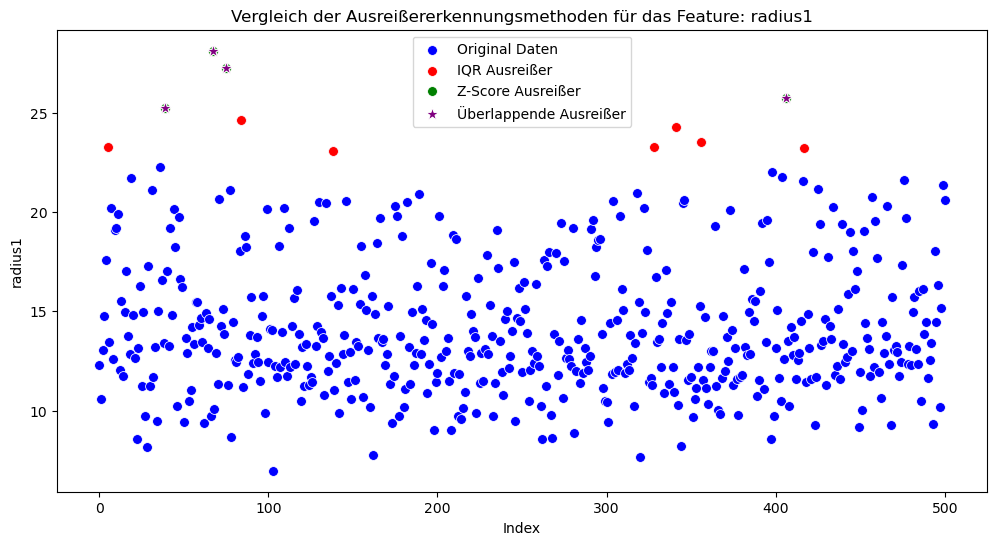

In [40]:
import seaborn as sns

features = data.columns[2:]  # Liste der Feature-Namen
feature = features[0]  # Erstes Feature für die Visualisierung wählen

# IQR Methode
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))
data_clean_iqr = data[~outliers_iqr]

# Z-Score Methode
z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
outliers_z = (z_scores > 3)
data_clean_z = data[~outliers_z]
# Überlappende Ausreißer identifizieren
overlapping_outliers = outliers_iqr & outliers_z

# Plot erstellen
plt.figure(figsize=(12, 6))

# Originaldaten
sns.scatterplot(x=data.index, y=data[feature], color='blue', label='Original Daten', s=50)

# IQR-Ausreißer
sns.scatterplot(x=data[outliers_iqr].index, y=data[feature][outliers_iqr], color='red', label='IQR Ausreißer', s=50)

# Z-Score-Ausreißer
sns.scatterplot(x=data[outliers_z].index, y=data[feature][outliers_z], color='green', label='Z-Score Ausreißer', s=50)

# Überlappende Ausreißer
sns.scatterplot(x=data[overlapping_outliers].index, y=data[feature][overlapping_outliers], color='purple', label='Überlappende Ausreißer', s=100, marker='*')

plt.title('Vergleich der Ausreißererkennungsmethoden für das Feature: ' + feature)
plt.xlabel('Index')
plt.ylabel(feature)
plt.legend()
plt.show()

In [41]:
# Annahme: 'data' ist Ihr DataFrame
features = data.columns[2:]  # Nehmen wir an, dass die ersten zwei Spalten keine Features sind

# IQR für alle Features berechnen
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

# Ausreißer entfernen mit IQR
outliers_iqr = ((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR)))
data_clean_iqr = data[~outliers_iqr.any(axis=1)]

# Z-Score für alle Features berechnen
z_scores = np.abs((data[features] - data[features].mean()) / data[features].std())

# Ausreißer entfernen mit Z-Score
outliers_z = (z_scores > 3)
data_clean_z = data[~outliers_z.any(axis=1)]

## Features
Der vorliegende Datensatz beinhaltet 29 Spalten. Davon ist eine Spalte "ID" kein Features und die Spalte "Diagnosis" gilt es vorherzusagen, sodass der Datensatz 27 potentielle Features hat.

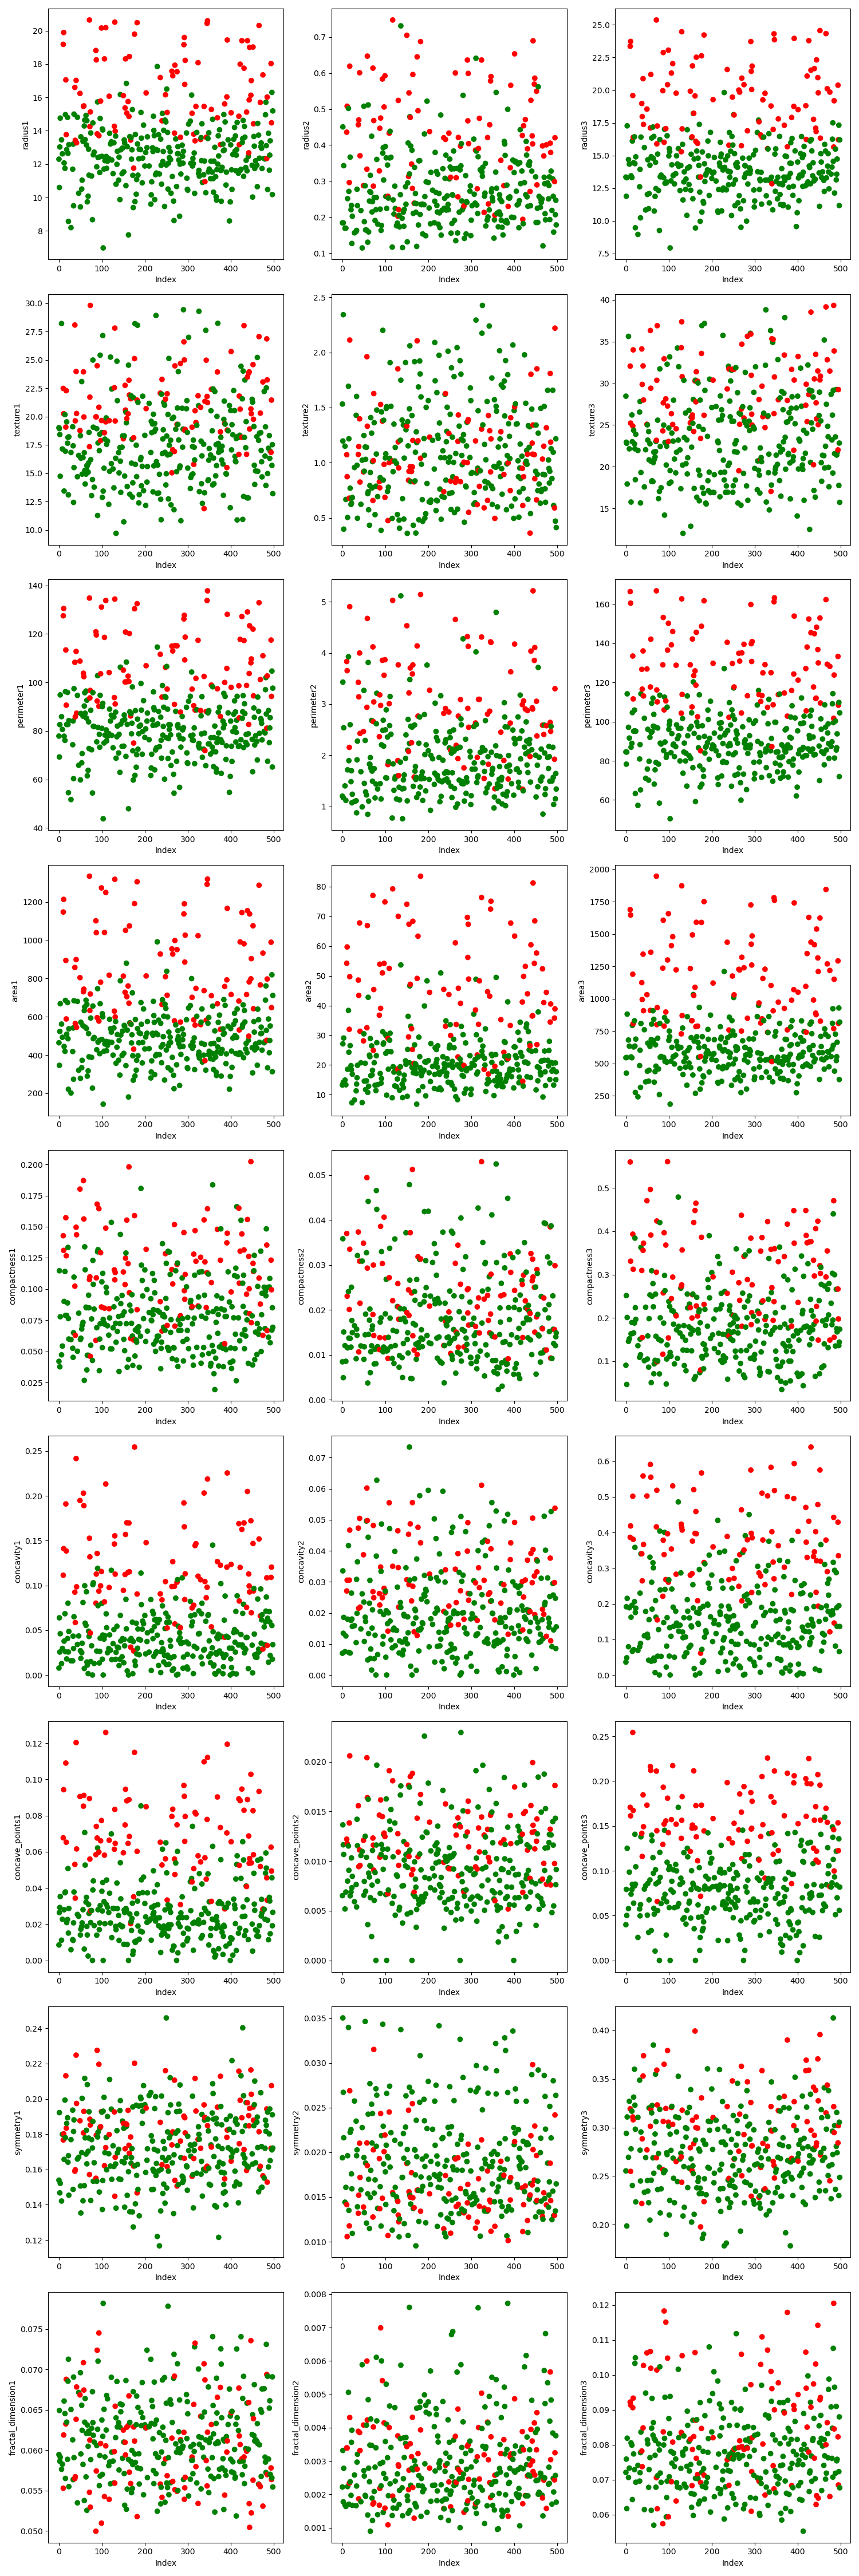

In [64]:
# Auswahl des Datensatzes
data = data_clean_iqr
#data = data_clean_z
# Aufteilen der Daten in Features und Labels
# Markiere die jeweiligen Datenpunkte als gutartig (blau) oder bösartig (rot)
colors = {1: 'red', 0: 'green'}

features = features[:9]
# Initialisiere das Subplot-Grid mit 3 Spalten und so vielen Zeilen wie nötig für die Features.
num_features = len(features)
num_columns = 3
num_rows = (num_features*3 + num_columns - 1) // num_columns  # Berechnet die Mindestanzahl an benötigten Zeilen.

# Erstelle eine Figur und ein Array von Achsen.
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Die Figurgröße kann angepasst werden.

# Flache Liste der Achsen für einfacheren Zugriff.
axs = axs.flatten()

# Gehe durch die Liste der Features und erstelle die Scatterplots.
for i, feature in enumerate(features):
    feature = feature[:-1]  # Entferne das letzte Zeichen des Feature-Namens.
    for j in range(1, 4):
        ax = axs[i * num_columns + j - 1]  # Wähle die richtige Achse für den aktuellen Subplot.
        ax.scatter(data.index, data[feature + str(j)], c=data['Diagnosis'].apply(lambda x: colors[x]))
        ax.set_xlabel('Index')
        ax.set_ylabel(feature + str(j))

# Anpassen des Layouts, damit die Beschriftungen nicht überlappen.
plt.tight_layout()
plt.show()


## Auswertung der Daten

Die Diagramme zeigen, dass die Daten in Ordnung sind und keine Ausreißer oder ungewöhnliche Werte vorhanden sind. Die Verteilungen der Variablen scheinen normal und konsistent zu sein. Es gibt keine offensichtlichen Abweichungen oder Anomalien in den Daten.

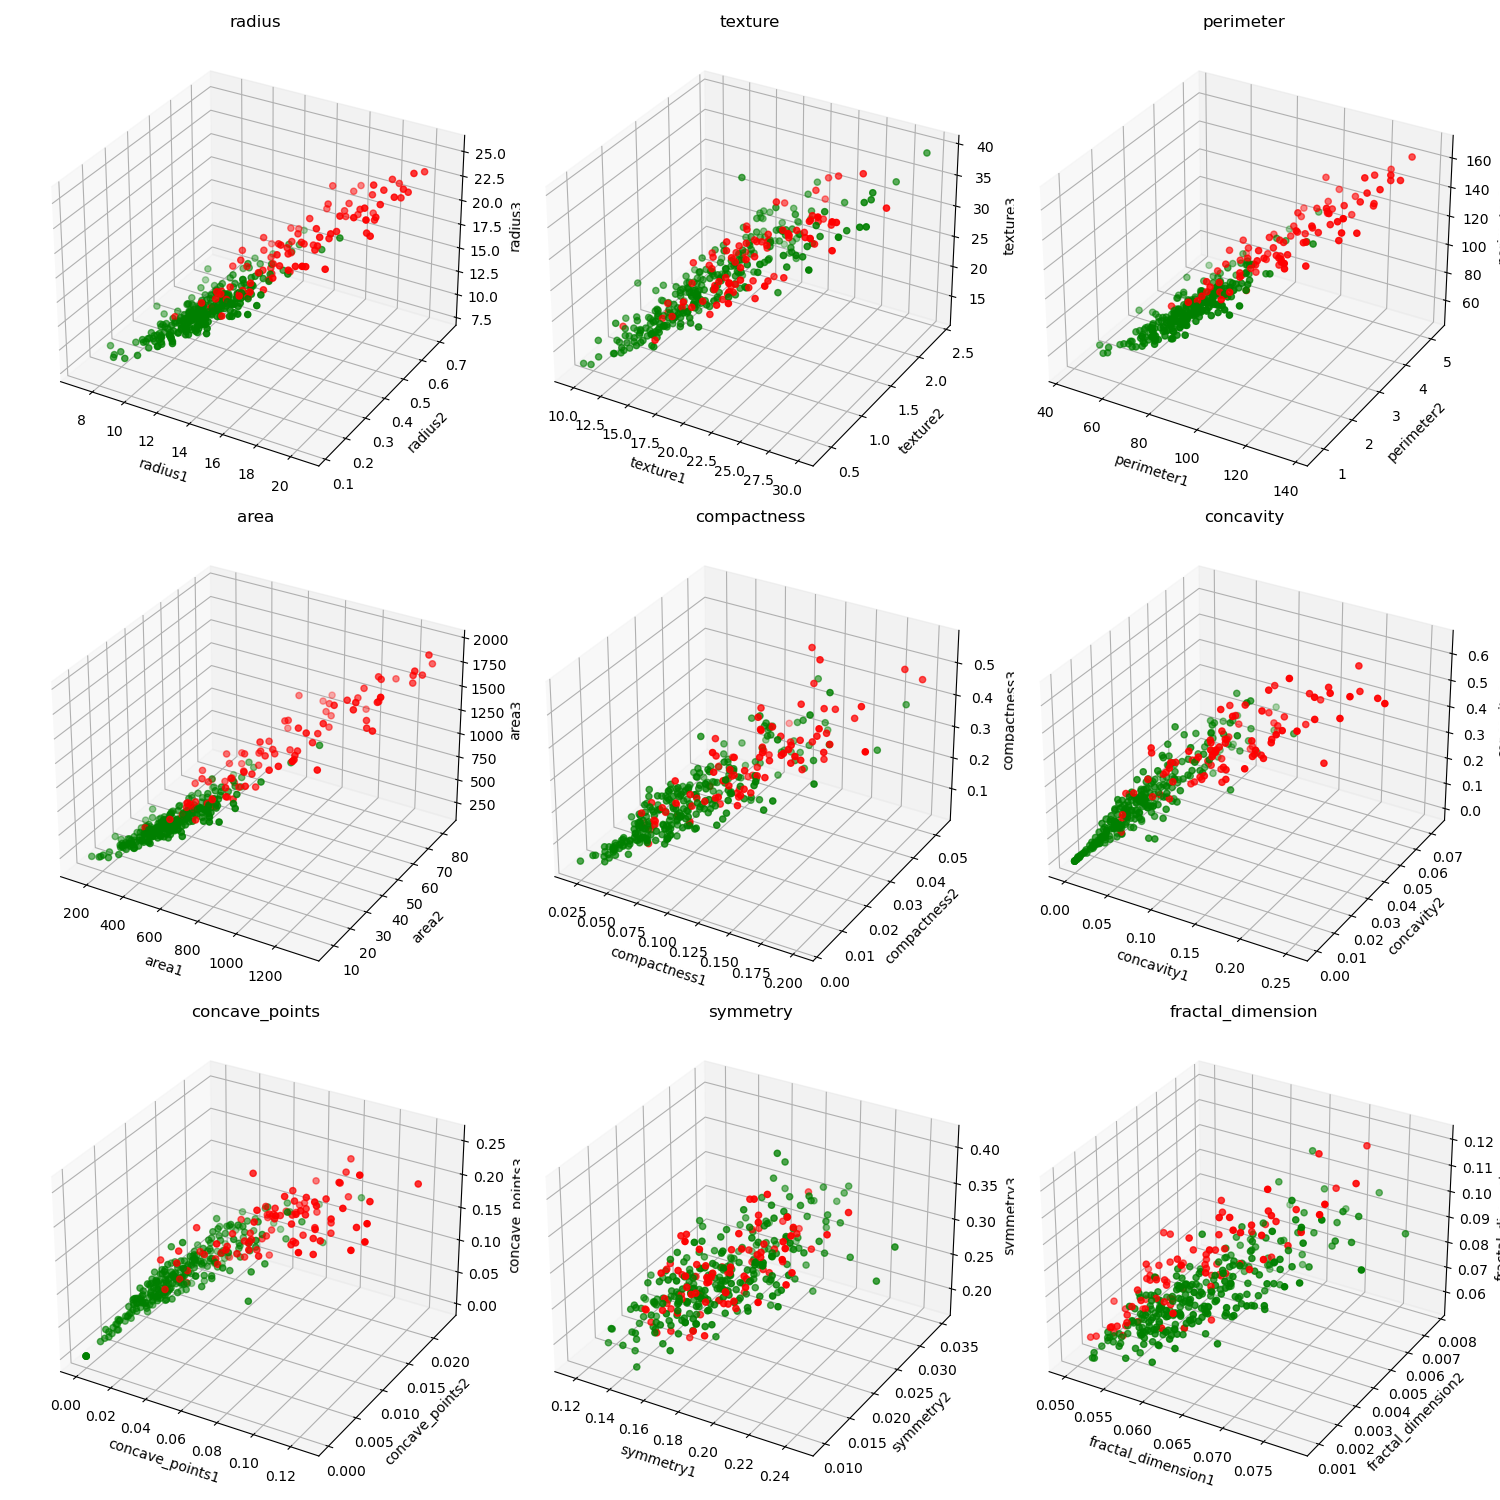

In [65]:
# Annahme, dass 'data' Ihr DataFrame und 'features' eine Liste der Feature-Namen ist
%matplotlib widget

# Berechnung der Dimensionen des Subplot-Grids
rows = int(np.ceil(len(features) / 3))  # Anpassung für 3 Spalten
fig = plt.figure(figsize=(15, 5 * rows))  # Anpassung der Gesamtgröße der Figur

for i, feature in enumerate(features):
    feature = feature[:-1]  # delete last string of feature
    x = data[feature+"1"].to_numpy()
    y = data[feature+"2"].to_numpy()
    z = data[feature+"3"].to_numpy()

    # Erstellung eines Subplots innerhalb eines Rasters
    ax = fig.add_subplot(rows, 3, i+1, projection='3d')

    # Scatterplot für aktuelles Feature
    ax.scatter(x, y, z, c=data['Diagnosis'].apply(lambda x: colors[x]), marker='o')
    ax.set_xlabel(feature+"1")
    ax.set_ylabel(feature+"2")
    ax.set_zlabel(feature+"3")
    ax.set_title(feature)  # Hinzufügen eines Titels für Klarheit

plt.tight_layout()  # Verbessert die Anordnung der Plots
plt.show()


## Data Splitting for Model Training 
This step is crucial for training and validating machine learning models. The dataset is divided into features (X) and the target variable (y). The train_test_split function is then used to split the data into training and validation sets. An 80/20 split ratio is commonly used for a good balance between training and validation.

In [66]:
X = data.iloc[:, 2:]  # Features sind die Spalten 3 bis n
y = data["Diagnosis"]  # Target ist die Spalte 2

# Aufteilen der Daten in Trainings- und Testdaten in einem Verhältnis von 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Skalierung
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [67]:

# Für die Vergleichbarkeit der Performance des Modells werden die Daten skaliert, normiert und unverändert verglichen
# Das Target muss nicht skaliert werden, da es sich um Klassen handelt
scaler = StandardScaler()  # scikit-learn StandardScaler
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)



### Normierung
Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer


In [68]:
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

### MinMax
Min-Max Scaling: Transforms features by scaling them to a fixed range, usually [0, 1]. It is useful when the parameters have to be transformed into a bounded interval.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [69]:
from sklearn.preprocessing import MinMaxScaler  # Importieren des MinMaxScaler

min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_test_min_max = min_max.transform(X_test)

# Multi Layer Perceptron

## Parameter of the MLP

In [70]:
params = {
    "hidden_layer_sizes": (10, 10, 10),  # Number of neurons in each layer
    "max_iter": 1000,  # Number of epochs
    "activation": "relu",  # Activation function
    "solver": "adam",  # Optimization algorithm
    "alpha": 0.0001,  # Regularization parameter
    "batch_size": "auto",  # Size of minibatches for stochastic optimizers
    "learning_rate": "constant",  # Learning rate schedule
    "learning_rate_init": 0.001,  # Initial learning rate
    "random_state": 42  # Seed for random number generator
}

In [71]:
mlp = MLPClassifier(**params)

# Modell mit Standarddaten
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print("MLP with origin Data")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

MLP with origin Data
[[56  2]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.87      0.87      0.87        15

    accuracy                           0.95        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.95      0.95      0.95        73



In [72]:
# Modell mit skalierten Daten
mlp.fit(X_train_scale, y_train)
predictions = mlp.predict(X_test_scale)
print("MLP with scaled Data")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

MLP with scaled Data
[[56  2]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.88      0.93      0.90        15

    accuracy                           0.96        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.96      0.96      0.96        73



In [73]:
# Modell mit normalisierten Daten
mlp.fit(X_train_norm, y_train)
predictions = mlp.predict(X_test_norm)
print("MLP with normalized Data")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

MLP with normalized Data
[[56  2]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.87      0.87      0.87        15

    accuracy                           0.95        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.95      0.95      0.95        73



In [74]:
# Modell mit MinMax skalierten Daten
mlp.fit(X_train_min_max, y_train)
predictions = mlp.predict(X_test_min_max)
print("MLP with MinMax scaled Data")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

MLP with MinMax scaled Data
[[57  1]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.93      0.93      0.93        15

    accuracy                           0.97        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.97      0.97      0.97        73



# Decision Tree

In [75]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Modell mit Standarddaten
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[51  7]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        58
           1       0.61      0.73      0.67        15

    accuracy                           0.85        73
   macro avg       0.77      0.81      0.78        73
weighted avg       0.86      0.85      0.85        73



In [76]:
# Modell mit skalierten Daten
dt.fit(X_train_scale, y_train)
predictions = dt.predict(X_test_scale)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[54  4]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.75      0.80      0.77        15

    accuracy                           0.90        73
   macro avg       0.85      0.87      0.86        73
weighted avg       0.91      0.90      0.91        73



In [77]:
# Modell mit normalisierten Daten
dt.fit(X_train_norm, y_train)
predictions = dt.predict(X_test_norm)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[55  3]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.81      0.87      0.84        15

    accuracy                           0.93        73
   macro avg       0.89      0.91      0.90        73
weighted avg       0.93      0.93      0.93        73



In [78]:
# Model with MinMax scaled data
dt.fit(X_train_min_max, y_train)
predictions = dt.predict(X_test_min_max)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[54  4]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.75      0.80      0.77        15

    accuracy                           0.90        73
   macro avg       0.85      0.87      0.86        73
weighted avg       0.91      0.90      0.91        73



# Support Vector Machine

In [79]:
# Support Vector Machine
from sklearn.svm import SVC

svc = SVC()

# Modell mit Standarddaten
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[56  2]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.87      0.87      0.87        15

    accuracy                           0.95        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.95      0.95      0.95        73



In [80]:
# Modell mit skalierten Daten
svc.fit(X_train_scale, y_train)
predictions = svc.predict(X_test_scale)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



[[55  3]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.82      0.93      0.87        15

    accuracy                           0.95        73
   macro avg       0.90      0.94      0.92        73
weighted avg       0.95      0.95      0.95        73



In [81]:
# Modell mit normalisierten Daten
svc.fit(X_train_norm, y_train)
predictions = svc.predict(X_test_norm)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



[[58  0]
 [14  1]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        58
           1       1.00      0.07      0.12        15

    accuracy                           0.81        73
   macro avg       0.90      0.53      0.51        73
weighted avg       0.85      0.81      0.73        73



In [82]:
# Modell mit MinMax skalierten Daten
svc.fit(X_train_min_max, y_train)
predictions = svc.predict(X_test_min_max)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[55  3]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.82      0.93      0.87        15

    accuracy                           0.95        73
   macro avg       0.90      0.94      0.92        73
weighted avg       0.95      0.95      0.95        73

